In [1]:
import pandas as pd
import os
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

load data

In [2]:
path_to_data = os.path.join('c:\\', 'openclassrooms', 'projet 8','house-prices-advanced-regression-techniques')
data_fname = 'test.csv'
data_test=pd.read_csv(os.path.join(path_to_data, data_fname), sep=",")
data_fname = 'train.csv'
data_train=pd.read_csv(os.path.join(path_to_data, data_fname), sep=",")


unnecessary column

In [3]:
ids=data_test['Id']
data_train.drop(['Id'],axis=1,inplace=True)
data_test.drop(['Id'],axis=1,inplace=True)

merge the two dataset for missing value and outliers treatment

In [4]:
all_data = pd.concat((data_train,data_test)).reset_index(drop=True)

In [5]:
print("data_test shape",data_test.shape)
print("data_train shape",data_train.shape)


ntrain = data_train.shape[0] #for recreating data later
ntest = data_test.shape[0] #for recreating data later



data_test shape (1459, 79)
data_train shape (1460, 80)


In [6]:
print(data_train.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     20850

In [7]:
num_cols = all_data.select_dtypes(include=['number'])
cat_cols = all_data.select_dtypes(include=['object'])

print(f'The dataset contains {len(num_cols.columns.tolist())} numerical columns \
and {len(cat_cols.columns.tolist())} categorical columns')

The dataset contains 37 numerical columns and 43 categorical columns


# Missing values

<AxesSubplot:>

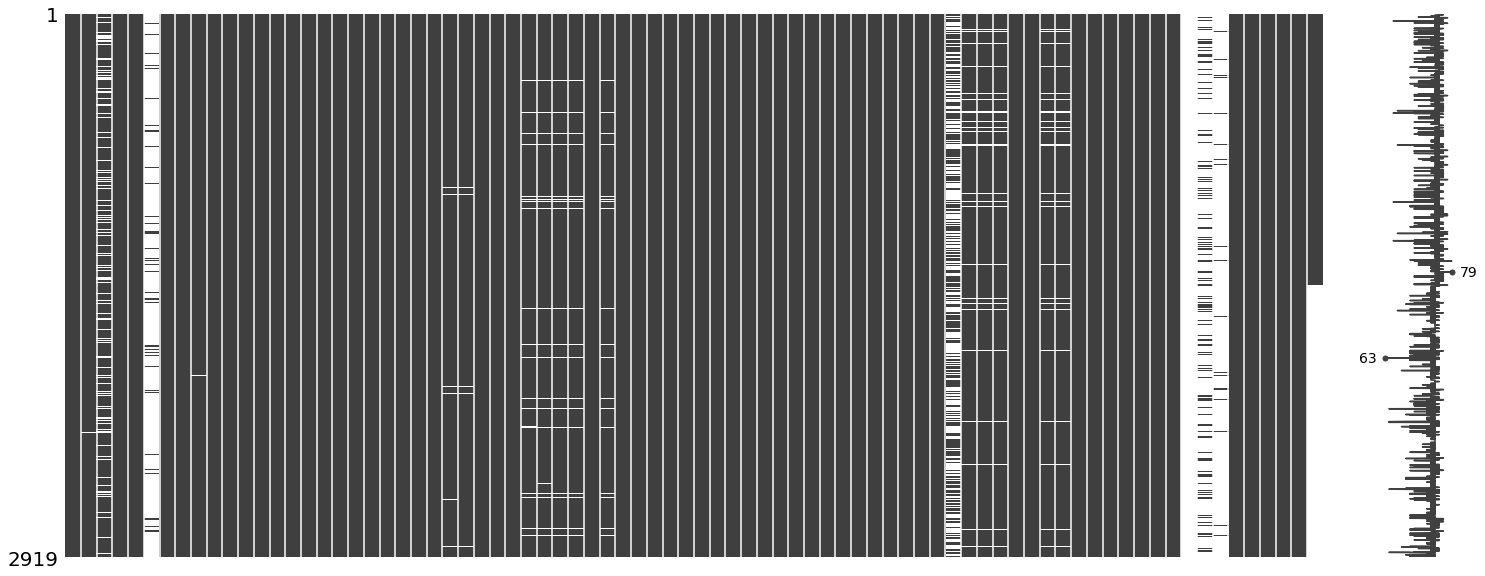

In [8]:
msno.matrix(all_data)

correlation of the missing value

<AxesSubplot:>

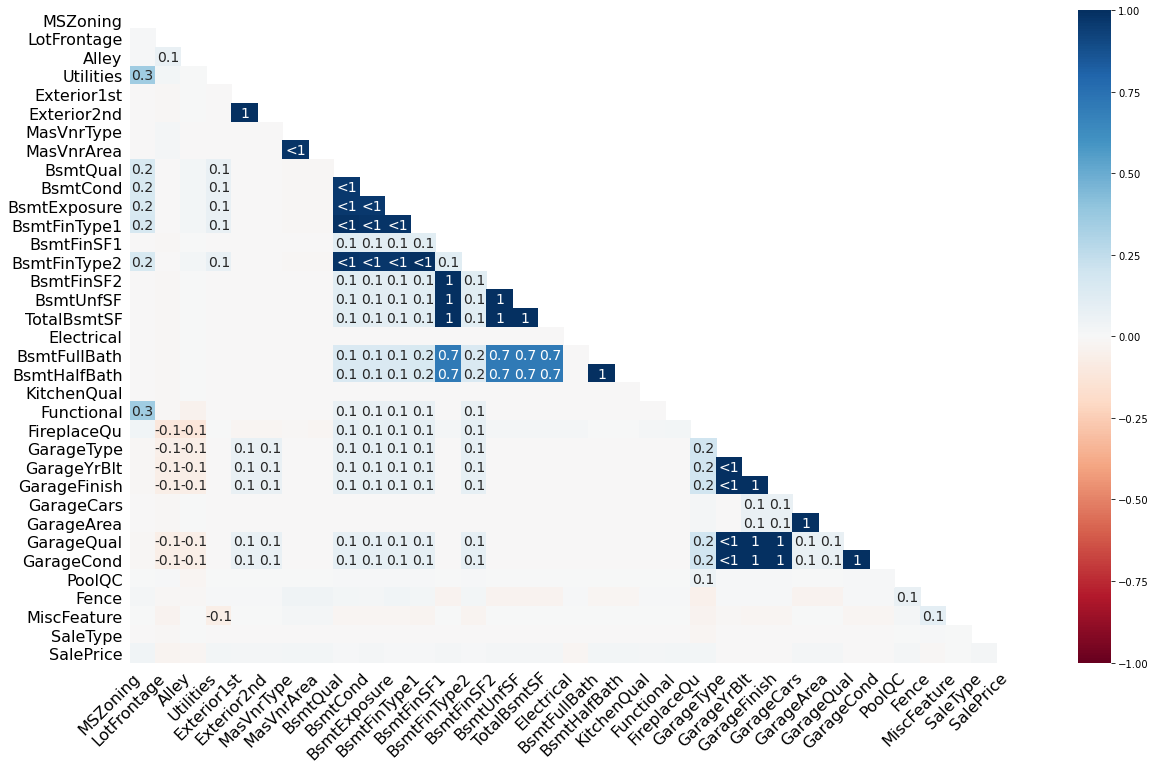

In [9]:
msno.heatmap(all_data)

In [10]:
#percentage of missing values for each column
na_ratio=all_data.isnull().sum()[all_data.isnull().sum()>0].sort_values(ascending=False)/len(all_data)*100
#number of missing values for each column
na_sum=all_data.isnull().sum()[all_data.isnull().sum()>0].sort_values(ascending=False)
pd.DataFrame(na_ratio,index=na_ratio.index,columns=['Missing Value Ratio']).head(15)

,Missing Value Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
SalePrice,49.982871
FireplaceQu,48.646797
LotFrontage,16.649538
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071


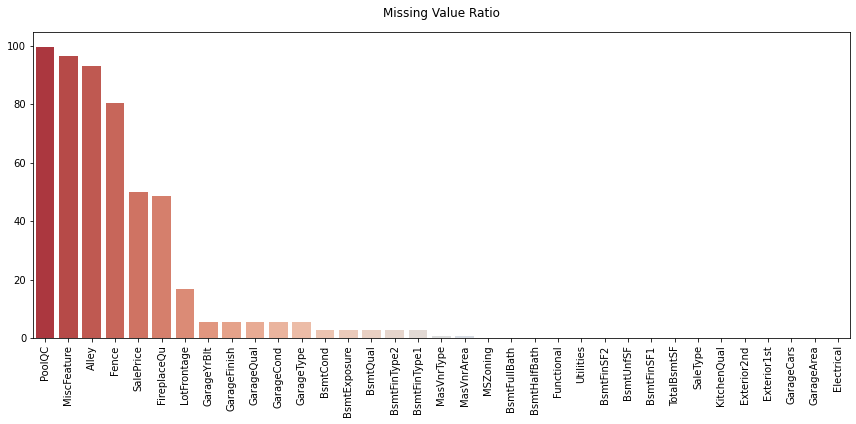

In [11]:
fig,axes=plt.subplots(1,1,figsize=(12,6))
# axes.grid(color='#909090',linestyle=':',linewidth=2)
plt.xticks(rotation=90)
sns.barplot(x=na_ratio.index,y=na_ratio,palette='coolwarm_r')
plt.title('Missing Value Ratio',color=('#000000'),y=1.03)
plt.tight_layout();

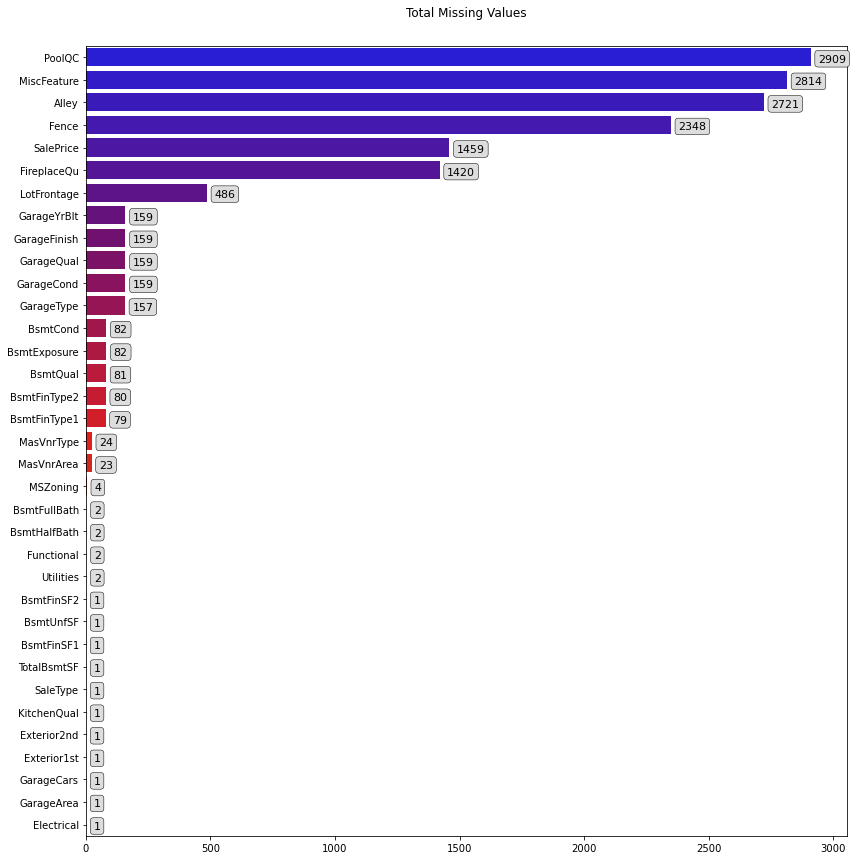

In [12]:
fig,axes=plt.subplots(1,1,figsize=(12,12))
sns.barplot(x=na_sum,y=na_sum.index,palette='brg')
for p in axes.patches:
            value = p.get_width()
            x = p.get_x() + p.get_width()+30
            y = p.get_y() + p.get_height()-.2
            axes.text(x, y, int(value), ha="left",fontsize=11,color='#000000',bbox=dict(facecolor='#dddddd', edgecolor='black',boxstyle='round', linewidth=.5))
plt.title('Total Missing Values',color=('#000000'),y=1.03)
plt.tight_layout();

# Data Year and data age

In [13]:
num_cols = data_train.select_dtypes(include=['number'])

In [14]:
year_feature = [feature for feature in num_cols if 'Yr' in feature or 'Year' in feature]

In [15]:
for feature in year_feature:
    print(feature, all_data[feature].unique())
    print('\n')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905
 1907 1896 1902 1895 1879 1901]


YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]


GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1

In [16]:
all_data['Age']=all_data['YrSold']-all_data['YearBuilt']+1
all_data['AgeRemodAdd']=all_data['YrSold']-all_data['YearRemodAdd']+1
all_data['AgeGarage']=all_data['YrSold']-all_data['GarageYrBlt']+1
del all_data['YearBuilt']
del all_data['YearRemodAdd']
del all_data['GarageYrBlt']


# first imputation thanks to strict nomenclature 

In [17]:
for i in ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu']:
    all_data[i]=all_data[i].apply(lambda x: 'None' if str(x)=='nan' else x)

Data description says:
-GarageType : NA means No garage
-GarageFinish : NA means No garage
-GarageQual : NA means No garage 
-GarageCond : NA means No garage

In [18]:
for i in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    all_data[i].fillna('None',inplace=True)

all_data['GarageArea'] = (np.where((all_data['GarageType']=='None'), 0, all_data['GarageArea']))
all_data['GarageCars'] = (np.where((all_data['GarageType']=='None'), 0, all_data['GarageCars']))
all_data['AgeGarage'] = (np.where((all_data['GarageType']=='None'), 0, all_data['AgeGarage']))

Data description says:
-BsmtQual: NA means No Basement
-BsmtCond: NA means No Basement
-BsmtExposure: NA means No Basement   
-BsmtFinType1: NA means No Basement 
-BsmtFinType2: NA means No Basement   

In [19]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[i].fillna('None',inplace=True)
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[i] = (np.where((all_data['BsmtQual']=='None'), 0, all_data[i]))

In [20]:
#percentage of missing values for each column
na_ratio=all_data.isnull().sum()[all_data.isnull().sum()>0].sort_values(ascending=False)/len(all_data)*100
#number of missing values for each column
na_sum=all_data.isnull().sum()[all_data.isnull().sum()>0].sort_values(ascending=False)
pd.DataFrame(na_ratio,index=na_ratio.index,columns=['Missing Value Ratio']).head(15)

,Missing Value Ratio
SalePrice,49.982871
LotFrontage,16.649538
MasVnrType,0.822199
MasVnrArea,0.787941
MSZoning,0.137033
AgeGarage,0.068517
Functional,0.068517
Utilities,0.068517
SaleType,0.034258
GarageArea,0.034258


# Exploring Important Features

Target variable is right skewed. Regression models work better with normal distributed data. We'll deal this before modelling.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


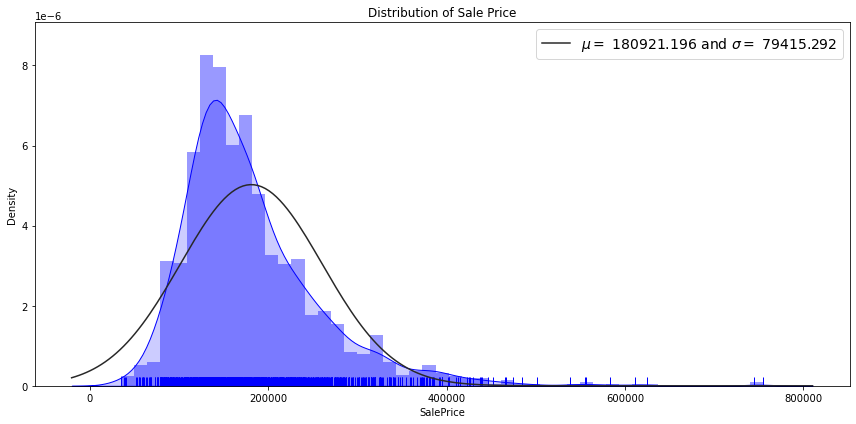

In [21]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
mu, sigma = norm.fit(data_train['SalePrice'])
sns.distplot(data_train['SalePrice'],fit=norm,color='b',rug=True,kde_kws={'shade':True,'color':'b','alpha':.2})
plt.legend(['$\mu=$ {:.3f} and $\sigma=$ {:.3f}'.format(mu, sigma)],fontsize=14)
plt.title('Distribution of Sale Price')
plt.tight_layout();

In [22]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Exploring the features that highly correlated with the target value is important. Because they effect model performance more than other features

In [23]:
corrs=data_train.drop('SalePrice',axis=1).corrwith(data_train['SalePrice']).sort_values(ascending=False)

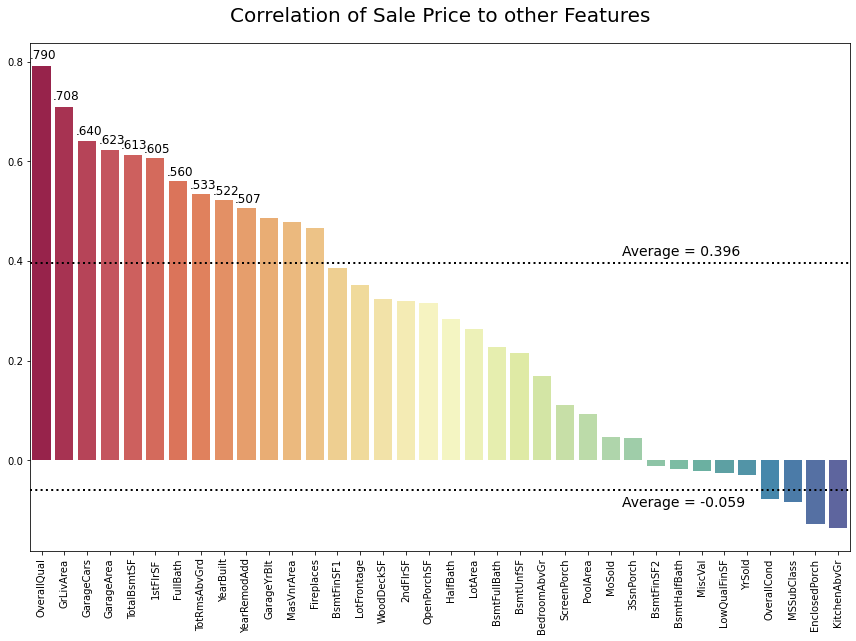

In [24]:
fig,axes=plt.subplots(1,1,figsize=(12,9))
axes.axhline(corrs[corrs>0].mean(), ls=':',color='black',linewidth=2)
axes.text(25.5,corrs[corrs>0].mean()+.015, "Average = {:.3f}".format(corrs[corrs>0].mean()),color='black',size=14)
axes.axhline(corrs[corrs<0].mean(), ls=':',color='black',linewidth=2)
axes.text(25.5,corrs[corrs<0].mean()-.035, "Average = {:.3f}".format(corrs[corrs<0].mean()),color='black',size=14)
sns.barplot(y=corrs,x=corrs.index,palette='Spectral')
plt.title('Correlation of Sale Price to other Features',size=20,color='black',y=1.03)
plt.xticks(rotation=90)
for p in axes.patches:
            value = p.get_height()
            if value <=.5:
                continue
            x = p.get_x() + p.get_width()-.9
            y = p.get_y() + p.get_height()+(.02*value)
            axes.text(x, y, str(value)[1:5], ha="left",fontsize=12,color='#000000')
plt.tight_layout();

<Figure size 2160x864 with 0 Axes>

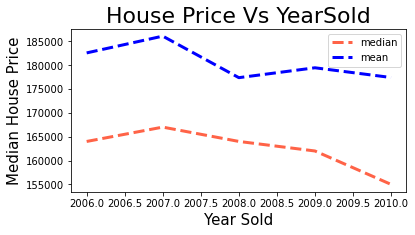

<Figure size 2160x864 with 0 Axes>

In [25]:
plt.subplots(1,1,figsize=(6,3))
all_data.groupby('YrSold')['SalePrice'].median().plot(color = "tomato",linestyle = "--",linewidth=3)
all_data.groupby('YrSold')['SalePrice'].mean().plot(color = "blue",linestyle = "--",linewidth=3)
plt.gca().legend(('median','mean'))
plt.xlabel('Year Sold',fontsize = 15)
plt.ylabel('Median House Price',fontsize =15)
plt.title("House Price Vs YearSold",fontsize=22)
plt.figure(figsize=(30,12))

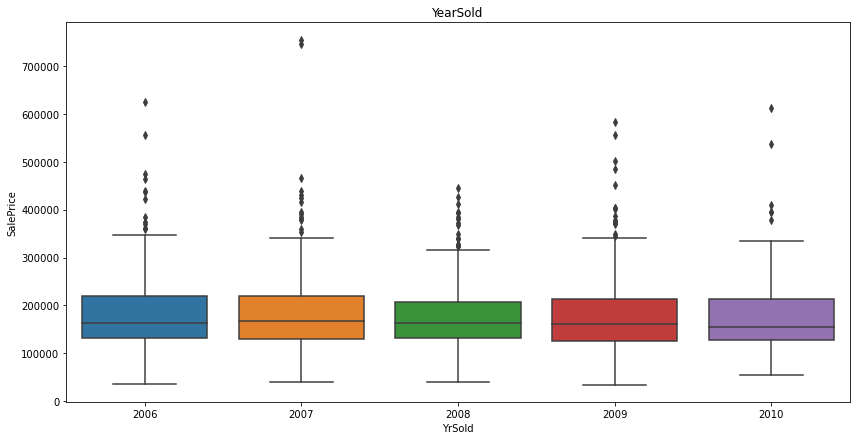

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_train, y='SalePrice',x='YrSold')
plt.tight_layout()
plt.title('YearSold');

<Figure size 2160x864 with 0 Axes>

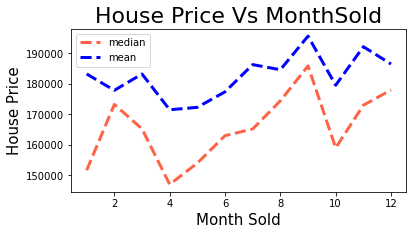

<Figure size 2160x864 with 0 Axes>

In [27]:
plt.subplots(1,1,figsize=(6,3))
all_data.groupby('MoSold')['SalePrice'].median().plot(color = "tomato",linestyle = "--",linewidth=3)
all_data.groupby('MoSold')['SalePrice'].mean().plot(color = "blue",linestyle = "--",linewidth=3)
plt.gca().legend(('median','mean'))
plt.xlabel('Month Sold',fontsize = 15)
plt.ylabel('House Price',fontsize =15)
plt.title("House Price Vs MonthSold",fontsize=22)
plt.figure(figsize=(30,12))

In [28]:
import datetime 
all_data['DaySold']=1
all_data2 = all_data[["YrSold", "MoSold",'DaySold']].copy()
all_data2.columns = ["year", "month", "day"]
all_data['year_month']=pd.to_datetime(all_data2[["year", "month", "day"]])

<Figure size 2160x864 with 0 Axes>

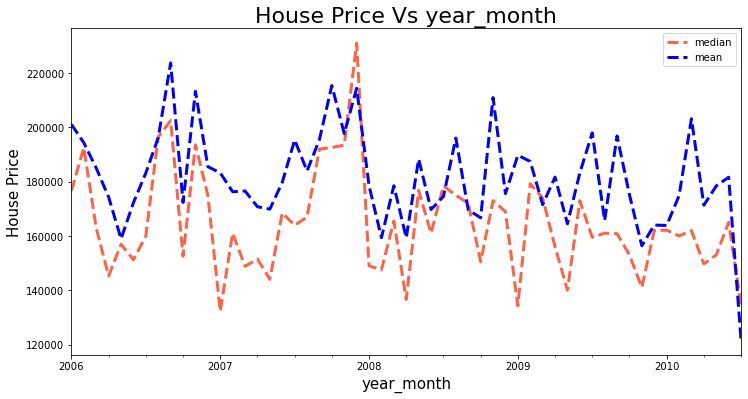

<Figure size 2160x864 with 0 Axes>

In [29]:
plt.subplots(1,1,figsize=(12,6))
all_data.groupby('year_month')['SalePrice'].median().plot(color = "tomato",linestyle = "--",linewidth=3)
all_data.groupby('year_month')['SalePrice'].mean().plot(color = "blue",linestyle = "--",linewidth=3)
plt.gca().legend(('median','mean'))
plt.xlabel('year_month',fontsize = 15)
plt.ylabel('House Price',fontsize =15)
plt.title("House Price Vs year_month",fontsize=22)
plt.figure(figsize=(30,12))

We can not notice huges differences during the period. We can show a small seasonality

let's look at the most correlated data
Exploring the features that highly correlated with the target value is important. Because they effect model performance more than other features.

In [30]:
print(corrs.head(15))

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
dtype: float64


In [31]:
print(corrs.tail(15))

BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64


OverallQual: Rates the overall material and finish of the house

Text(0.5, 1.0, 'Overall Quality')

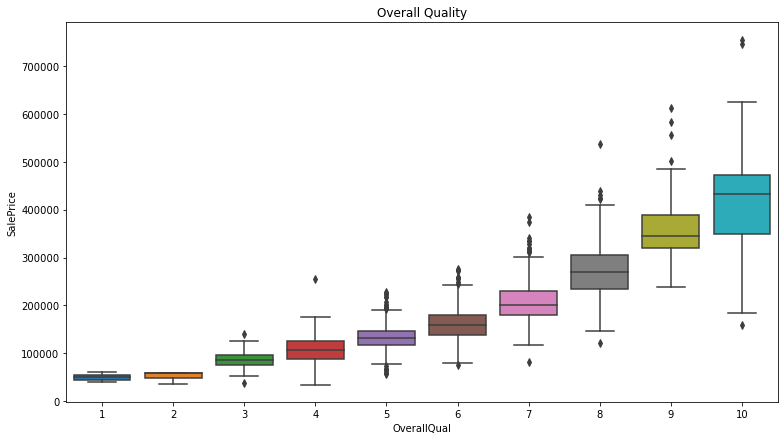

In [32]:
plt.figure(figsize=(11,6))
sns.boxplot(data=data_train, y='SalePrice',x='OverallQual')
plt.tight_layout()
plt.title('Overall Quality')

we can note some outliers.

In [33]:
data_train[(data_train['OverallQual']==4 ) & (data_train['SalePrice']>200000)][['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePrice']]

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
457,1663,2,529,1364,256000


In [34]:
data_train[(data_train['OverallQual']==8 ) & (data_train['SalePrice']>450000)][['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePrice']]

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
769,3279,3,841,1650,538000


In [35]:
data_train[(data_train['OverallQual']==10 ) & (data_train['SalePrice']<200000)][['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePrice']]

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
523,4676,3,884,3138,184750
1298,5642,2,1418,6110,160000


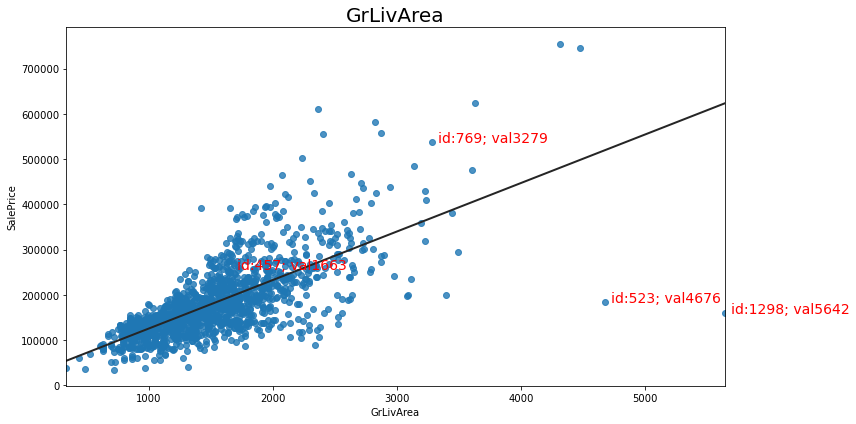

In [36]:
plt.figure(figsize=(12,6))
p1=sns.regplot(x='GrLivArea',y='SalePrice',data=data_train,line_kws={'color':'#252525','linewidth':2},ci=0,marker='o')
for index in [457,769,523,1298]:
    p1.text(data_train['GrLivArea'][index]+50, data_train['SalePrice'][index],s="id:"+str(index)+"; val"+str(data_train['GrLivArea'][index]) ,size=14, color='red')
plt.title('GrLivArea',size=20)
plt.tight_layout();

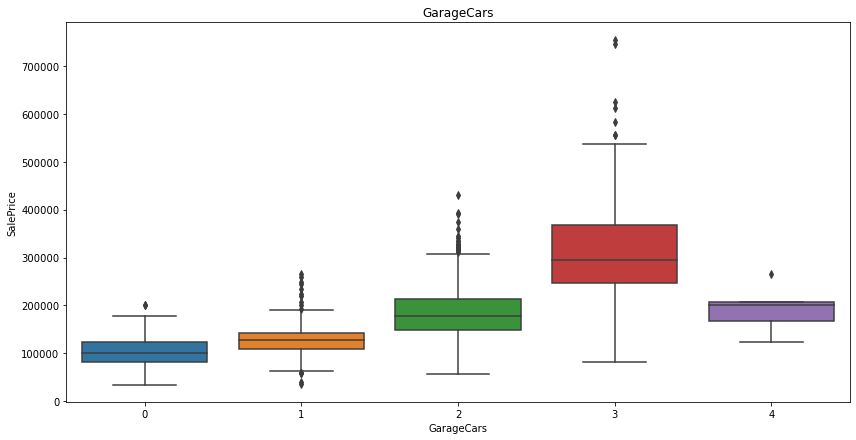

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data_train, y='SalePrice',x='GarageCars')
plt.tight_layout()
plt.title('GarageCars');

In [38]:
print(data_train.groupby('GarageCars')['SalePrice'].count())

GarageCars
0     81
1    369
2    824
3    181
4      5
Name: SalePrice, dtype: int64


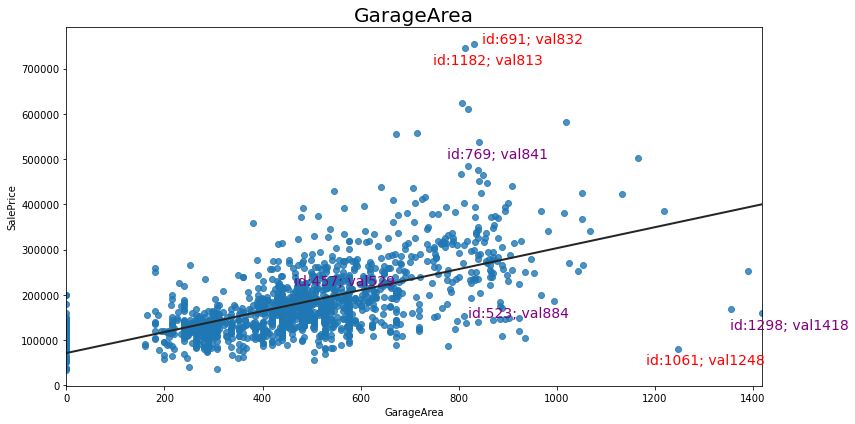

In [39]:
plt.figure(figsize=(12,6))
p1=sns.regplot(x='GarageArea',y='SalePrice',data=data_train,line_kws={'color':'#252525','linewidth':2},ci=0,marker='o')

#new outliers
p1.text(data_train['GarageArea'][691]+15, data_train['SalePrice'][691],s="id:"+str(691)+"; val"+str(data_train['GarageArea'][691]) ,size=14, color='red')
p1.text(data_train['GarageArea'][1182]-65, data_train['SalePrice'][1182]-35000,s="id:"+str(1182)+"; val"+str(data_train['GarageArea'][1182]) ,size=14, color='red')
p1.text(data_train['GarageArea'][1061]-65, data_train['SalePrice'][1061]-35000,s="id:"+str(1061)+"; val"+str(data_train['GarageArea'][1061]) ,size=14, color='red')

#old outliers
p1.text(data_train['GarageArea'][457]-65, data_train['SalePrice'][457]-35000,s="id:"+str(457)+"; val"+str(data_train['GarageArea'][457]) ,size=14, color='purple')
p1.text(data_train['GarageArea'][769]-65, data_train['SalePrice'][769]-35000,s="id:"+str(769)+"; val"+str(data_train['GarageArea'][769]) ,size=14, color='purple')
p1.text(data_train['GarageArea'][523]-65, data_train['SalePrice'][523]-35000,s="id:"+str(523)+"; val"+str(data_train['GarageArea'][523]) ,size=14, color='purple')
p1.text(data_train['GarageArea'][1298]-65, data_train['SalePrice'][1298]-35000,s="id:"+str(1298)+"; val"+str(data_train['GarageArea'][1298]) ,size=14, color='purple')


plt.title('GarageArea',size=20)
plt.tight_layout();

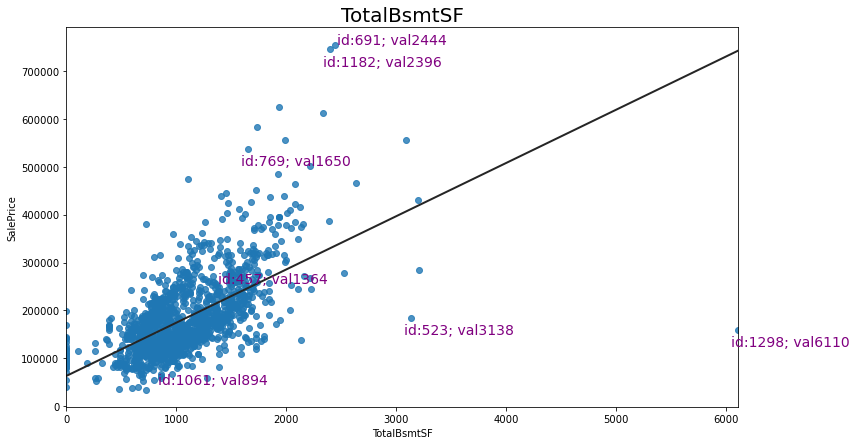

In [40]:
plt.figure(figsize=(12,6))
p1=sns.regplot(x='TotalBsmtSF',y='SalePrice',data=data_train,line_kws={'color':'#252525','linewidth':2},ci=0,marker='o')
#old outliers
p1.text(data_train['TotalBsmtSF'][457]+15, data_train['SalePrice'][457],s="id:"+str(457)+"; val"+str(data_train['TotalBsmtSF'][457]) ,size=14, color='purple')
p1.text(data_train['TotalBsmtSF'][691]+15, data_train['SalePrice'][691],s="id:"+str(691)+"; val"+str(data_train['TotalBsmtSF'][691]) ,size=14, color='purple')
p1.text(data_train['TotalBsmtSF'][1182]-65, data_train['SalePrice'][1182]-35000,s="id:"+str(1182)+"; val"+str(data_train['TotalBsmtSF'][1182]) ,size=14, color='purple')
p1.text(data_train['TotalBsmtSF'][1061]-65, data_train['SalePrice'][1061]-35000,s="id:"+str(1061)+"; val"+str(data_train['TotalBsmtSF'][1061]) ,size=14, color='purple')
p1.text(data_train['TotalBsmtSF'][769]-65, data_train['SalePrice'][769]-35000,s="id:"+str(769)+"; val"+str(data_train['TotalBsmtSF'][769]) ,size=14, color='purple')
p1.text(data_train['TotalBsmtSF'][523]-65, data_train['SalePrice'][523]-35000,s="id:"+str(523)+"; val"+str(data_train['TotalBsmtSF'][523]) ,size=14, color='purple')
p1.text(data_train['TotalBsmtSF'][1298]-65, data_train['SalePrice'][1298]-35000,s="id:"+str(1298)+"; val"+str(data_train['TotalBsmtSF'][1298]) ,size=14, color='purple')

plt.tight_layout()
plt.title('TotalBsmtSF',size=20);

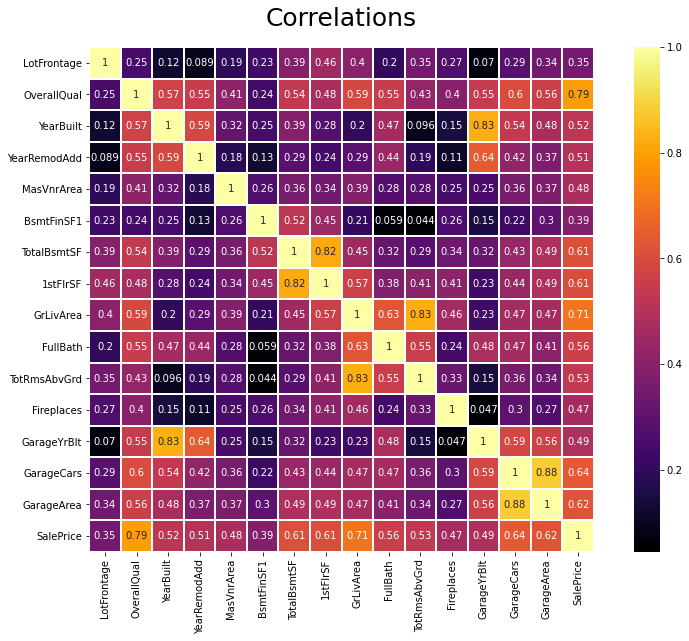

In [41]:
plt.figure(figsize=(12,9))
corrmat = data_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.35]
sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap='inferno',square=True,linewidths=1)
plt.title('Correlations',size=25,y=1.03)
plt.tight_layout();



Let's look more particularly at index 457 which always seems average except for the overall quality

In [42]:
for variable in data_train.columns:
    print("{}:{}".format(variable,data_train[variable].loc[457]))
data_train['OverallQual'].loc[457]=5

MSSubClass:20
MSZoning:RL
LotFrontage:nan
LotArea:53227
Street:Pave
Alley:nan
LotShape:IR1
LandContour:Low
Utilities:AllPub
LotConfig:CulDSac
LandSlope:Mod
Neighborhood:ClearCr
Condition1:Norm
Condition2:Norm
BldgType:1Fam
HouseStyle:1Story
OverallQual:4
OverallCond:6
YearBuilt:1954
YearRemodAdd:1994
RoofStyle:Flat
RoofMatl:Tar&Grv
Exterior1st:Plywood
Exterior2nd:Plywood
MasVnrType:None
MasVnrArea:0.0
ExterQual:TA
ExterCond:TA
Foundation:CBlock
BsmtQual:Gd
BsmtCond:TA
BsmtExposure:Gd
BsmtFinType1:BLQ
BsmtFinSF1:1116
BsmtFinType2:Unf
BsmtFinSF2:0
BsmtUnfSF:248
TotalBsmtSF:1364
Heating:GasA
HeatingQC:Ex
CentralAir:Y
Electrical:SBrkr
1stFlrSF:1663
2ndFlrSF:0
LowQualFinSF:0
GrLivArea:1663
BsmtFullBath:1
BsmtHalfBath:0
FullBath:1
HalfBath:0
BedroomAbvGr:2
KitchenAbvGr:1
KitchenQual:Gd
TotRmsAbvGrd:6
Functional:Min1
Fireplaces:2
FireplaceQu:Gd
GarageType:Attchd
GarageYrBlt:1954.0
GarageFinish:Fin
GarageCars:2
GarageArea:529
GarageQual:TA
GarageCond:TA
PavedDrive:Y
WoodDeckSF:224
OpenPorchSF:

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Test data might has some outliers like we discovered in train data. So deleting this outliers may affect badly to the model.
However this outliers can be observe more than one features.(GrLivArea,TotalBsmtSF and the features we create later)
I believe deleting them improve the model.

In [43]:
data_train.drop(index=[523,1298,691,1061,1182],inplace=True)

# missing value imputation

In [44]:
pd.DataFrame(na_ratio,index=na_ratio.index,columns=['Missing Value Ratio']).head(20)

,Missing Value Ratio
SalePrice,49.982871
LotFrontage,16.649538
MasVnrType,0.822199
MasVnrArea,0.787941
MSZoning,0.137033
AgeGarage,0.068517
Functional,0.068517
Utilities,0.068517
SaleType,0.034258
GarageArea,0.034258


None is yet a category

<AxesSubplot:>

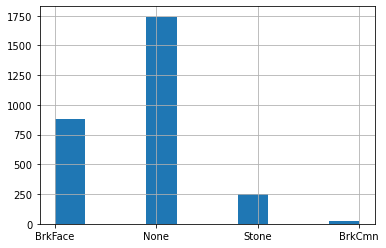

In [45]:
all_data["MasVnrType"].hist()

In [46]:
all_data["MasVnrType"].fillna("None",inplace=True)
all_data["MasVnrArea"].fillna(0,inplace=True)

MSZoning: Identifies the general zoning classification of the sale.
Electrical: Electrical system
KitchenQual: Kitchen quality
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
SaleType: Type of sale
We can fill Na values of above features with their most repeating value.


In [47]:
for i in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd'):
    all_data[i+'_mode']=all_data.groupby("Neighborhood")[i].apply(lambda x: x.fillna(x.mode()[0],inplace=True))
    all_data.loc[(all_data[i].isna()),i] = all_data[i+'_mode']
    del all_data[i+'_mode']
for i in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd'):
    all_data[i].fillna(all_data[i].mode()[0],inplace=True)

all_data['SaleType'].fillna(all_data['SaleType'].mode()[0],inplace=True)

LotFrontage is linear feet of street connected to property. Imputing missing values by the median LotFrontage of the neighborhood/MSZoning seems best option. In a second step, I impute with the median of the neighborhood.

Text(0.5, 1.0, 'LotFrontage')

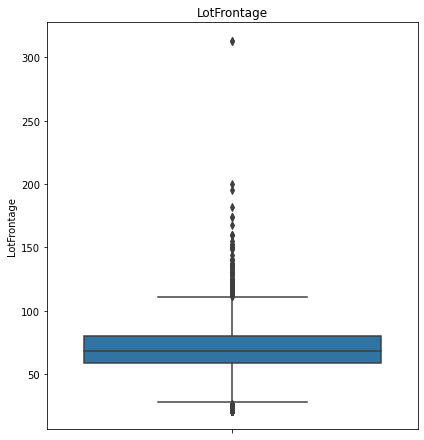

In [48]:
plt.figure(figsize=(6,6))
sns.boxplot(data=all_data, y='LotFrontage')
plt.tight_layout()
plt.title('LotFrontage')

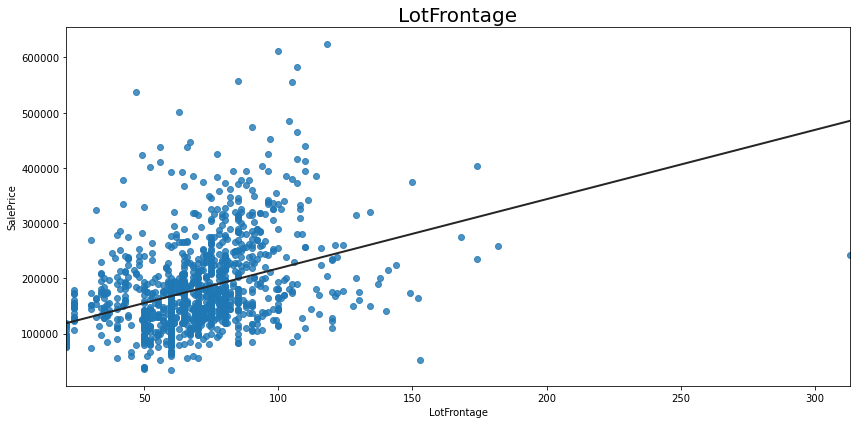

In [49]:
plt.figure(figsize=(12,6))
p1=sns.regplot(x='LotFrontage',y='SalePrice',data=data_train,line_kws={'color':'#252525','linewidth':2},ci=0,marker='o')
plt.title('LotFrontage',size=20)
plt.tight_layout();

In [50]:
all_data[(all_data['LotFrontage']>250 )][['GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePrice']]

,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
934,2069,2.0,505.0,585.0,242000.0
1298,5642,2.0,1418.0,6110.0,160000.0


In [51]:
all_data.loc[(all_data['LotFrontage']>250),'LotFrontage']=np.nan

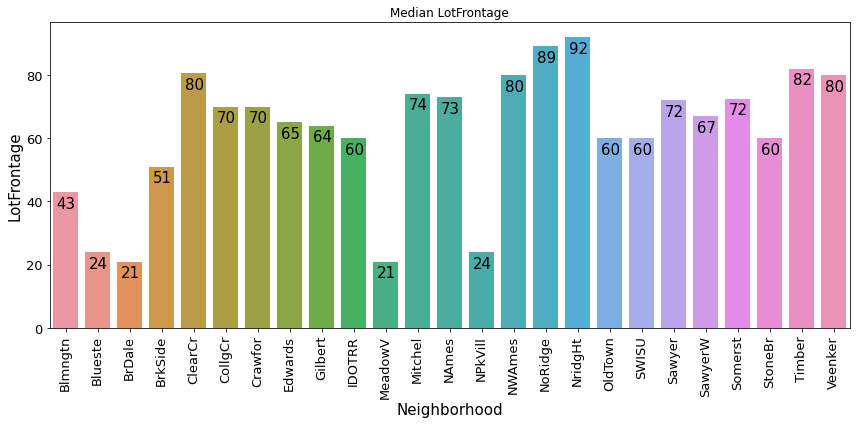

In [52]:
fig,axes=plt.subplots(1,1,figsize=(12,6))

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('LotFrontage',size=15)
plt.xlabel('Neighborhood',size=15)
mean_lot=all_data.groupby("Neighborhood").median()['LotFrontage']
sns.barplot(x=mean_lot.index,y=mean_lot)
for p in axes.patches:
            value = p.get_height()
            x = p.get_x() +.12
            y = p.get_y() + p.get_height()-5
            axes.text(x, y, int(value), ha="left",fontsize=15,color='#000000')
plt.xticks(rotation=90)
plt.title('Median LotFrontage',color='black')
plt.tight_layout();

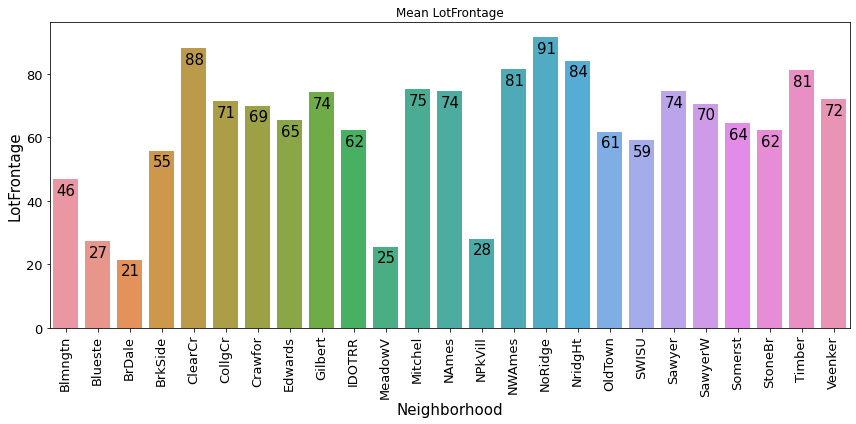

In [53]:
fig,axes=plt.subplots(1,1,figsize=(12,6))

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('LotFrontage',size=15)
plt.xlabel('Neighborhood',size=15)
mean_lot=all_data.groupby("Neighborhood").mean()['LotFrontage']
sns.barplot(x=mean_lot.index,y=mean_lot)
for p in axes.patches:
            value = p.get_height()
            x = p.get_x() +.12
            y = p.get_y() + p.get_height()-5
            axes.text(x, y, int(value), ha="left",fontsize=15,color='#000000')
plt.xticks(rotation=90)
plt.title('Mean LotFrontage',color='black')
plt.tight_layout();

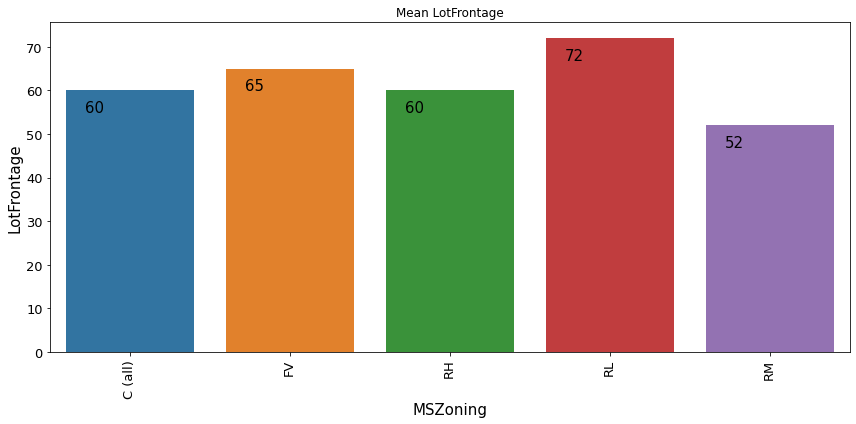

In [54]:
fig,axes=plt.subplots(1,1,figsize=(12,6))

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('LotFrontage',size=15)
plt.xlabel('MSZoning',size=15)
mean_lot=all_data.groupby("MSZoning").median()['LotFrontage']
sns.barplot(x=mean_lot.index,y=mean_lot)
for p in axes.patches:
            value = p.get_height()
            x = p.get_x() +.12
            y = p.get_y() + p.get_height()-5
            axes.text(x, y, int(value), ha="left",fontsize=15,color='#000000')
plt.xticks(rotation=90)
plt.title('Mean LotFrontage',color='black')
plt.tight_layout();

In [55]:
pd.crosstab(all_data['Neighborhood'],all_data['MSZoning'])

MSZoning,C (all),FV,RH,RL,RM
Neighborhood,,,,,
Blmngtn,0,0,0,25,3
Blueste,0,0,0,0,10
BrDale,0,0,0,0,30
BrkSide,0,0,0,43,65
ClearCr,0,0,0,44,0
CollgCr,0,0,0,253,14
Crawfor,0,0,2,91,10
Edwards,0,0,2,180,12
Gilbert,0,0,0,165,0


In [56]:
pd.crosstab(all_data['Neighborhood'],all_data['MSZoning'],values=all_data.LotFrontage, aggfunc='median')

MSZoning,C (all),FV,RH,RL,RM
Neighborhood,,,,,
Blmngtn,NaN,NaN,NaN,43.0,NaN
Blueste,NaN,NaN,NaN,NaN,24.0
BrDale,NaN,NaN,NaN,NaN,21.0
BrkSide,NaN,NaN,NaN,55.0,51.0
ClearCr,NaN,NaN,NaN,80.5,NaN
CollgCr,NaN,NaN,NaN,70.0,37.0
Crawfor,NaN,NaN,82.0,70.0,44.0
Edwards,NaN,NaN,62.0,65.0,35.0
Gilbert,NaN,NaN,NaN,64.0,NaN


In [57]:
all_data['zone_neighborhood']=all_data['Neighborhood']+" "+all_data["MSZoning"]
all_data['LotFrontage_medians_1']=all_data.groupby("zone_neighborhood")['LotFrontage'].apply(lambda x: x.fillna(x.median()))
all_data['LotFrontage_medians_2']=all_data.groupby("Neighborhood")['LotFrontage'].apply(lambda x: x.fillna(x.median()))
del all_data['zone_neighborhood']

In [58]:
all_data['LotFrontage']
all_data.loc[(all_data['LotFrontage'].isna()),'LotFrontage'] = all_data['LotFrontage_medians_1']
all_data.loc[(all_data['LotFrontage'].isna()),'LotFrontage'] = all_data['LotFrontage_medians_2']
del all_data['LotFrontage_medians_1']
del all_data['LotFrontage_medians_2']

imputation of garage variable missing value 

In [59]:
all_data[all_data['AgeGarage'].isna()][['GarageType','Age','Neighborhood']]

,GarageType,Age,Neighborhood
2126,Detchd,99,OldTown
2576,Detchd,85,IDOTRR


In [60]:
all_data[(all_data['Neighborhood']=="OldTown") & (all_data['GarageType']=="Detchd")]['GarageType'].count()

177

In [61]:
all_data[(all_data['Neighborhood']=="IDOTRR") & (all_data['GarageType']=="Detchd")]['GarageType'].count()

63

In [62]:
all_data['agegarage_median']=all_data.groupby(['Neighborhood','GarageType'])['AgeGarage'].apply(lambda x: x.fillna(x.median()))
all_data.loc[(all_data['AgeGarage'].isna()),'AgeGarage'] = all_data['agegarage_median']
del all_data['agegarage_median']

In [63]:
all_data[all_data['GarageCars'].isna()][['GarageType','Age','Neighborhood']]

,GarageType,Age,Neighborhood
2576,Detchd,85,IDOTRR


In [64]:
all_data['GarageCars_mode']=all_data.groupby(['Neighborhood','GarageType'])['GarageCars'].apply(lambda x: x.fillna(x.mode()[0]))
all_data.loc[(all_data['GarageCars'].isna()),'GarageCars'] = all_data['GarageCars_mode']
del all_data['GarageCars_mode']

In [65]:
all_data[all_data['GarageArea'].isna()][['GarageType','Age','Neighborhood']]

,GarageType,Age,Neighborhood
2576,Detchd,85,IDOTRR


In [66]:
all_data['GarageArea_mode']=all_data.groupby(['Neighborhood','GarageType'])['GarageArea'].apply(lambda x: x.fillna(x.median()))
all_data.loc[(all_data['GarageArea'].isna()),'GarageArea'] = all_data['GarageArea_mode']
del all_data['GarageArea_mode']

In [67]:
for i in ('Utilities','Functional'):
    all_data[i+'_mode']=all_data.groupby(['Neighborhood','MSZoning'])[i].apply(lambda x: x.fillna(x.mode()[0]))
    all_data.loc[(all_data[i].isna()),i] = all_data[i+'_mode']
del all_data[i+'_mode']

In [68]:
all_data.isnull().sum().sort_values(ascending=False)

SalePrice         1459
Utilities_mode       0
BsmtFinType1         0
MasVnrType           0
MasVnrArea           0
                  ... 
GarageType           0
GarageFinish         0
GarageCars           0
GarageArea           0
MSSubClass           0
Length: 83, dtype: int64

# Feature Engineering

Changing some numeric variables.
There are 3 variables that are seems numeric but should actually be categorical in the data.
MSSubClass,YrSold and MoSold.

In [69]:
all_data['MoSold'] = all_data['MoSold'].apply(str)
all_data['YrSold'] = all_data['YrSold'].apply(str)

In [70]:
x=  { 20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY',
        80:'SPLIT',
        85:'SPLIT FOYER',
        90:'DUPLEX',
       120:'1-STORY PUD',
       150:'1-1/2 STORY PUD',
       160:'2-STORY PUD',
       180:'PUD - MULTILEVEL',
       190:'2 FAMILY CONVERSION'}

In [71]:
all_data['MSSubClass']=all_data['MSSubClass'].map(x)

In [72]:
x=  {        
       'Ex':5,
       'Gd':4,
       'TA':3,
       'Fa':2,
       'Po':1,
       'None':0}

In [73]:
all_data['ExterQual']=all_data['ExterQual'].map(x)
all_data['ExterCond']=all_data['ExterCond'].map(x)
all_data['BsmtQual']=all_data['BsmtQual'].map(x)
all_data['BsmtCond']=all_data['BsmtCond'].map(x)
all_data['HeatingQC']=all_data['HeatingQC'].map(x)
all_data['FireplaceQu']=all_data['FireplaceQu'].map(x)
all_data['GarageCond']=all_data['GarageCond'].map(x)
all_data['GarageQual']=all_data['GarageQual'].map(x)
all_data['PoolQC']=all_data['PoolQC'].map(x)


Adding new features

-OverallQual: Rates the overall material and finish of the house
-OverallCond: Rates the overall condition of the house

In [74]:
pd.crosstab(all_data['OverallQual'],all_data['OverallCond'])

OverallCond,1,2,3,4,5,6,7,8,9
OverallQual,,,,,,,,,
1,1,0,2,0,1,0,0,0,0
2,1,2,3,3,4,0,0,0,0
3,1,2,8,9,11,6,1,2,0
4,2,1,11,31,76,55,42,6,2
5,2,3,16,43,300,221,178,53,9
6,0,1,8,10,355,174,118,59,6
7,0,0,1,4,454,64,43,21,13
8,0,0,0,1,311,10,8,3,9
9,0,1,1,0,105,0,0,0,0


In [75]:
all_data['TotalHomeQuality'] = all_data['OverallQual'] + all_data['OverallCond']

In [76]:
all_data['TotalGarageQuality'] = all_data['GarageCond']+all_data['GarageQual']
all_data['TotalExterQuality'] = all_data['ExterCond']+all_data['ExterQual']
all_data['TotalBsmtQuality'] = all_data['BsmtCond']+all_data['BsmtQual']

-TotalBsmtSF Total square feet of basement area
-GrLivArea: Above grade (ground) living area square feet
-BsmtUnfSF: Unfinished square feet of basement area

In [77]:
all_data[['TotalBsmtSF','BsmtUnfSF','GrLivArea','1stFlrSF','2ndFlrSF']]

,TotalBsmtSF,BsmtUnfSF,GrLivArea,1stFlrSF,2ndFlrSF
0,856.0,150.0,1710,856,854
1,1262.0,284.0,1262,1262,0
2,920.0,434.0,1786,920,866
3,756.0,540.0,1717,961,756
4,1145.0,490.0,2198,1145,1053
...,...,...,...,...,...
2914,546.0,546.0,1092,546,546
2915,546.0,294.0,1092,546,546
2916,1224.0,0.0,1224,1224,0
2917,912.0,575.0,970,970,0


In [78]:
all_data['TotalSF_finished'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']-all_data['BsmtUnfSF']
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['GrLivArea']
all_data['Bsmt_Unf_share']=all_data['BsmtUnfSF']/all_data['TotalSF']

BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade

In [79]:
all_data[['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']]

,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath
0,2,1,1.0,0.0
1,2,0,0.0,1.0
2,2,1,1.0,0.0
3,1,0,1.0,0.0
4,2,1,1.0,0.0
...,...,...,...,...
2914,1,1,0.0,0.0
2915,1,1,0.0,0.0
2916,1,0,1.0,0.0
2917,1,0,0.0,1.0


In [80]:
all_data['TotalBathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) + all_data['BsmtFullBath'] + (0.5*all_data['BsmtHalfBath']))

OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet

In [81]:
all_data[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']]

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,61,0,0,0
1,0,0,0,0
2,42,0,0,0
3,35,272,0,0
4,84,0,0,0
...,...,...,...,...
2914,0,0,0,0
2915,24,0,0,0
2916,0,0,0,0
2917,32,0,0,0


LowQualFinSF: Low quality finished square feet (all floors)

In [82]:
all_data['low_qual_share']=all_data['LowQualFinSF']/all_data['GrLivArea']

In [83]:
all_data['TotRmsAbvGrd_withoutbedroomskitchen']=all_data['TotRmsAbvGrd']-all_data['BedroomAbvGr']-all_data['KitchenAbvGr']
       

In [84]:
all_data['TotalPorchSF'] = all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']

MiscVal: Value of miscellaneous feature

In [85]:
all_data['MiscVal'].corr(all_data['SalePrice'])

-0.021189579640303248

# Data organization

In [86]:
num_cols = all_data.select_dtypes(include=['number'])
cat_cols = all_data.select_dtypes(include=['object'])

print(f'The dataset contains {len(num_cols.columns.tolist())} numerical columns \
and {len(cat_cols.columns.tolist())} categorical columns')

The dataset contains 55 numerical columns and 38 categorical columns


numerical data

In [87]:
print(num_cols.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal', 'SalePrice', 'Age',
       'AgeRemodAdd', 'AgeGarage', 'DaySold', 'TotalHomeQuality',
       'TotalGarageQuality', 'TotalExterQuality', 'TotalBsmtQuality',
       'TotalSF_finished', 'TotalSF', 'Bsmt_Unf_share', 'TotalBathrooms',
       'low_qual_share', 'TotRmsAbvGrd_withoutbedroomskitchen',
       'TotalPorchSF'],
      dtype='object')


rearrangement of the numerical columns

In [88]:
num_cols=num_cols[['SalePrice','LotFrontage', 'LotArea', 'MasVnrArea', \
                   'GarageArea', 'WoodDeckSF','TotalPorchSF','TotalSF', \
                   'AgeRemodAdd',\
                   'TotalHomeQuality','TotalExterQuality','TotalBsmtQuality','HeatingQC','FireplaceQu',\
                   'TotalGarageQuality','PoolQC','Fireplaces',\
                   'TotalBathrooms','KitchenAbvGr','BedroomAbvGr',\
                   'Bsmt_Unf_share','low_qual_share', 'TotRmsAbvGrd_withoutbedroomskitchen']]
      

In [89]:
print(num_cols.columns)

Index(['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'GarageArea',
       'WoodDeckSF', 'TotalPorchSF', 'TotalSF', 'AgeRemodAdd',
       'TotalHomeQuality', 'TotalExterQuality', 'TotalBsmtQuality',
       'HeatingQC', 'FireplaceQu', 'TotalGarageQuality', 'PoolQC',
       'Fireplaces', 'TotalBathrooms', 'KitchenAbvGr', 'BedroomAbvGr',
       'Bsmt_Unf_share', 'low_qual_share',
       'TotRmsAbvGrd_withoutbedroomskitchen'],
      dtype='object')


In [90]:
num_cols.head()

,SalePrice,LotFrontage,LotArea,MasVnrArea,GarageArea,WoodDeckSF,TotalPorchSF,TotalSF,AgeRemodAdd,TotalHomeQuality,...,FireplaceQu,TotalGarageQuality,PoolQC,Fireplaces,TotalBathrooms,KitchenAbvGr,BedroomAbvGr,Bsmt_Unf_share,low_qual_share,TotRmsAbvGrd_withoutbedroomskitchen
0,208500.0,65.0,8450,196.0,548.0,0,61,2566.0,6,12,...,0,6,0,0,3.5,1,3,0.058457,0.0,4
1,181500.0,80.0,9600,0.0,460.0,298,0,2524.0,32,14,...,3,6,0,1,2.5,1,3,0.112520,0.0,2
2,223500.0,68.0,11250,162.0,608.0,0,42,2706.0,7,12,...,3,6,0,1,3.5,1,3,0.160384,0.0,2
3,140000.0,60.0,9550,0.0,642.0,0,307,2473.0,37,12,...,4,6,0,1,2.0,1,3,0.218358,0.0,3
4,250000.0,84.0,14260,350.0,836.0,192,84,3343.0,9,13,...,3,6,0,1,3.5,1,4,0.146575,0.0,4


Explanatory Features vs SalePrice

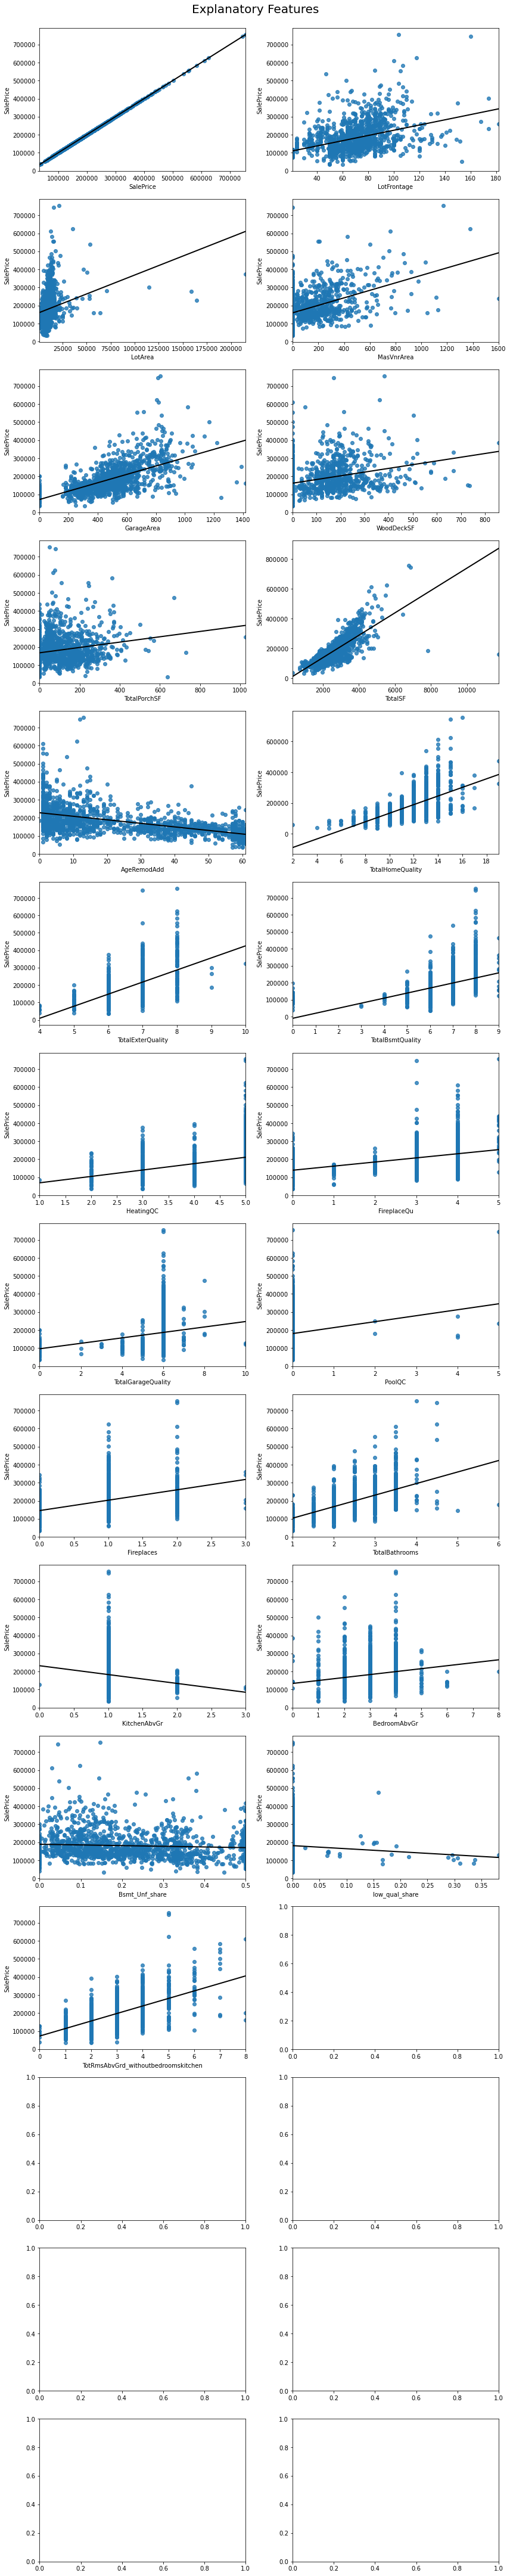

In [91]:
data=num_cols.columns
fig,axes=plt.subplots(ncols=2,nrows=15,figsize=(12,60))
for i, feature in enumerate(all_data[data]):
    row = int(i/2)
    col = i%2
    sns.regplot(x=all_data[feature],y=all_data['SalePrice'], ax=axes[row][col],ci=0,line_kws={'color':'#000000','linewidth':2},marker='o')
plt.suptitle('Explanatory Features',y=1,size=20)
all_data[data].iloc[:, i]
plt.tight_layout()

In skewed data, the tail region may act as an outlier for the statistical model and that
outliers adversely affect the model’s performance especially regression-based models.
I transform the skewed data with log1p to improve model.

In [92]:
list_log1p=['LotFrontage','LotArea','MasVnrArea','WoodDeckSF','TotalSF','TotalPorchSF','GarageArea']
for i in list_log1p:
    num_cols[i]=np.log1p(num_cols[i])

In [93]:
num_cols_name=num_cols.columns

In [94]:
num_cols.isnull().sum().sort_values(ascending=False)

SalePrice                              1459
TotalExterQuality                         0
LotFrontage                               0
LotArea                                   0
MasVnrArea                                0
GarageArea                                0
WoodDeckSF                                0
TotalPorchSF                              0
TotalSF                                   0
AgeRemodAdd                               0
TotalHomeQuality                          0
TotRmsAbvGrd_withoutbedroomskitchen       0
low_qual_share                            0
HeatingQC                                 0
FireplaceQu                               0
TotalGarageQuality                        0
PoolQC                                    0
Fireplaces                                0
TotalBathrooms                            0
KitchenAbvGr                              0
BedroomAbvGr                              0
Bsmt_Unf_share                            0
TotalBsmtQuality                

categorical variables

In [95]:
print(cat_cols.columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Utilities_mode'],
      dtype='object')


In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in cat_cols.columns:
    cat_cols[feature]=le.fit_transform(cat_cols[feature])

<ipython-input-96-eb3949436a18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_cols[feature]=le.fit_transform(cat_cols[feature])


In [97]:
cat_cols

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Utilities_mode
0,10,3,1,1,3,3,0,4,0,5,...,1,2,2,4,1,4,2,8,4,0
1,4,3,1,1,3,3,0,2,0,24,...,1,2,2,4,1,7,1,8,4,0
2,10,3,1,1,0,3,0,4,0,5,...,1,2,2,4,1,11,2,8,4,0
3,9,3,1,1,0,3,0,0,0,6,...,5,3,2,4,1,4,0,8,0,0
4,10,3,1,1,0,3,0,2,0,15,...,1,2,2,4,1,3,2,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,11,4,1,1,3,3,0,4,0,10,...,6,1,2,4,1,8,0,8,4,0
2915,11,4,1,1,3,3,0,4,0,10,...,4,3,2,4,1,6,0,8,0,0
2916,4,3,1,1,3,3,0,4,0,11,...,5,3,2,4,1,11,0,8,0,0
2917,15,3,1,1,3,3,0,4,0,11,...,6,1,2,2,3,9,0,8,4,0


Let's look at the heatmap of the correlations of categorical variables

<AxesSubplot:>

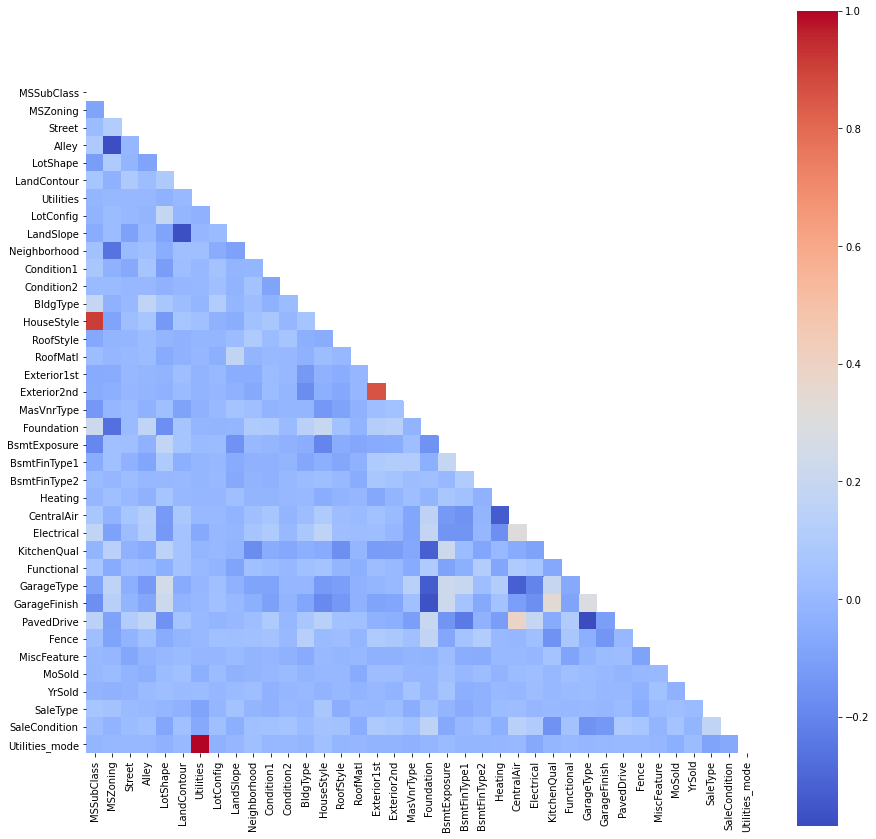

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(cat_cols.corr(), square=True, mask = np.triu(cat_cols.corr()), cmap= "coolwarm")

In [99]:
cat_corr = cat_cols.corr()
cat_corr_triu = cat_corr.where(np.triu(np.ones(cat_corr.shape), k=1).astype(np.bool))

cat_collinear_features = [column for column in cat_corr_triu.columns if any(cat_corr_triu[column] > 0.60) or any(cat_corr_triu[column] <-0.60)]

In [100]:
cat_collinear_features

['HouseStyle', 'Exterior2nd', 'Utilities_mode']

dropping collinear features

In [101]:
cat_cols.drop(columns = cat_collinear_features,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [102]:
cat_cols_name=cat_cols.columns

In [103]:
all_data=pd.concat([num_cols, cat_cols], axis = 1) 

In [104]:
all_data.describe

<bound method NDFrame.describe of       SalePrice  LotFrontage   LotArea  MasVnrArea  GarageArea  WoodDeckSF  \
0      208500.0     4.189655  9.042040    5.283204    6.308098    0.000000   
1      181500.0     4.394449  9.169623    0.000000    6.133398    5.700444   
2      223500.0     4.234107  9.328212    5.093750    6.411818    0.000000   
3      140000.0     4.110874  9.164401    0.000000    6.466145    0.000000   
4      250000.0     4.442651  9.565284    5.860786    6.729824    5.262690   
...         ...          ...       ...         ...         ...         ...   
2914        NaN     3.091042  7.568896    0.000000    0.000000    0.000000   
2915        NaN     3.091042  7.546974    0.000000    5.659482    0.000000   
2916        NaN     5.081404  9.903538    0.000000    6.357842    6.163315   
2917        NaN     4.143135  9.253591    0.000000    0.000000    4.394449   
2918        NaN     4.317488  9.172431    4.553877    6.478510    5.252273   

      TotalPorchSF   TotalSF 

Transform the categorical variables in dummy variables

In [105]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

X_dummy=all_data[['MSSubClass', 'MSZoning',\
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',\
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',\
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', \
       'Foundation', 'BsmtExposure',\
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',\
       'Electrical', 'Functional', 'GarageType', 'GarageFinish',\
       'PavedDrive', 'Fence',\
       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]
ct = ColumnTransformer([("dummy", OneHotEncoder(),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33])], remainder="passthrough") 
X_dummy=ct.fit_transform(X_dummy).toarray()

In [106]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer 
#
#X_dummy=all_data[['MSSubClass', 'MSZoning',\
#       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',\
#       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',\
#       'RoofStyle', 'MasVnrType', 'ExterQual',\
#       'ExterCond', 'Foundation', 'BsmtQual',\
#       'Heating', 'HeatingQC', 'CentralAir',\
#       'Electrical', 'Functional', 'FireplaceQu', 'GarageType', \
#       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',\
#       'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]
#ct = ColumnTransformer([("dummy", OneHotEncoder(),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])], remainder="passthrough") 
#X_dummy=ct.fit_transform(X_dummy).toarray()

Spliting the data_train and tha data_test

In [107]:
data_train = all_data[:ntrain]
X_dummy_train=X_dummy[:ntrain]
data_test = all_data[ntrain:]
X_dummy_test=X_dummy[ntrain:]

In [108]:
data_train

,SalePrice,LotFrontage,LotArea,MasVnrArea,GarageArea,WoodDeckSF,TotalPorchSF,TotalSF,AgeRemodAdd,TotalHomeQuality,...,Functional,GarageType,GarageFinish,PavedDrive,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,208500.0,4.189655,9.042040,5.283204,6.308098,0.000000,4.127134,7.850493,6,12,...,6,1,2,2,4,1,4,2,8,4
1,181500.0,4.394449,9.169623,0.000000,6.133398,5.700444,0.000000,7.833996,32,14,...,6,1,2,2,4,1,7,1,8,4
2,223500.0,4.234107,9.328212,5.093750,6.411818,0.000000,3.761200,7.903596,7,12,...,6,1,2,2,4,1,11,2,8,4
3,140000.0,4.110874,9.164401,0.000000,6.466145,0.000000,5.730100,7.813592,37,12,...,6,5,3,2,4,1,4,0,8,0
4,250000.0,4.442651,9.565284,5.860786,6.729824,5.262690,4.442651,8.114923,9,13,...,6,1,2,2,4,1,3,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,4.143135,8.976894,0.000000,6.133398,0.000000,3.713572,7.863651,8,11,...,6,1,2,2,4,1,10,1,8,4
1456,210000.0,4.454347,9.486152,4.787492,6.216606,5.857933,0.000000,8.193124,23,12,...,2,1,3,2,2,1,4,4,8,4
1457,266500.0,4.204693,9.109746,0.000000,5.533389,0.000000,4.110874,8.158516,5,16,...,6,1,2,2,0,3,7,4,8,4
1458,142125.0,4.234107,9.181735,0.000000,5.484797,5.905362,4.727388,7.676474,15,11,...,6,1,3,2,4,1,6,4,8,4


log1p transform of the dependent variable

In [109]:
data_train['SalePrice']=np.log1p(data_train['SalePrice'])

<ipython-input-109-279783966c3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['SalePrice']=np.log1p(data_train['SalePrice'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


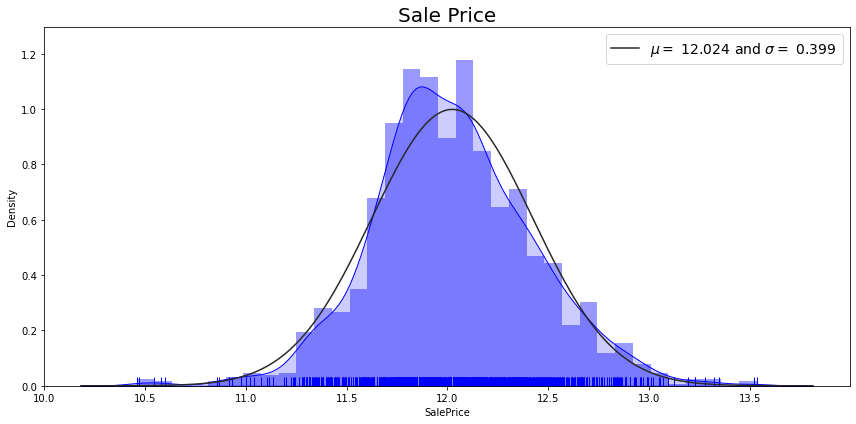

In [110]:
plt.figure(figsize=(12,6))
mu, sigma = norm.fit(data_train['SalePrice'])
sns.distplot(data_train['SalePrice'],fit=norm,color='b',rug=True,kde_kws={'shade':True,'color':'b','alpha':.2})
plt.legend(['$\mu=$ {:.3f} and $\sigma=$ {:.3f}'.format(mu, sigma)],fontsize=14)
plt.title('Sale Price',size=20)
plt.tight_layout();

In [111]:
data_train.to_csv(os.path.join(path_to_data,'data_train.csv'),index = True, header=True)

In [112]:
data_test.to_csv(os.path.join(path_to_data,'data_test.csv'),index = True, header=True)

In [113]:
pd.DataFrame(X_dummy_train).to_csv(os.path.join(path_to_data,'X_dummy_train.csv'),index = True, header=True)
pd.DataFrame(X_dummy_test).to_csv(os.path.join(path_to_data,'X_dummy_test.csv'),index = True, header=True)